In [67]:
import os
import sys
import numpy as np
import pandas as pd
from sklearn import datasets
import statsmodels.api as sm
from stargazer.stargazer import Stargazer
from IPython.display import display, HTML
import matplotlib.pyplot as plt

In [68]:
#Importing Configs
# Define the path where config.py is located
#Mac
os.chdir('/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling')
#Linux
#os.chdir('/home/kwnabors/Documents/GitHub/Finance-ML-Modeling')
config_file_path = os.getcwd()
print(config_file_path)

# Add this path to the sys.path
sys.path.append(config_file_path)

import config

#Configs
finbert_models = config.finbert_models
Body = config.Body
database = config.Local_Database

/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling


In [69]:
sentiment_mb = pd.read_csv(f'/Users/kylenabors/Documents/Database/Models/FinBERT Models/taylor MBreak.csv')
sentiment_mbe = pd.read_csv(f'/Users/kylenabors/Documents/Database/Models/FinBERT Models/taylor MBreak Euro.csv')

sentiment_mb['date'] = pd.to_datetime(sentiment_mb['date'])
sentiment_mbe['date'] = pd.to_datetime(sentiment_mbe['date'])

In [70]:
# mins = pd.read_csv(f"{finbert_models}/{Body}/Minutes/{Body}_Minutes_finbert_model_short.csv")
# mins['date'] = pd.to_datetime(mins['date'])
# mins = mins[['date', 'sentiment']]
# mins = mins.groupby('date').mean().reset_index()

# spreturn = pd.read_csv(f'{database}/Market Data/SP500/SP500 Returns Daily.csv')
# spreturn = spreturn.rename(columns={'caldt':'date', 'vwretd':'sp500_return'})
# spreturn['date'] = pd.to_datetime(spreturn['date'])

# mins = pd.merge(mins, spreturn, on='date', how='outer')

# mins = mins[['date', 'sentiment', 'sp500_return']]

# mins = mins[mins['date'] > '2000-01-01']

# sentiment_groups = ['sp500_return'
#                     ]
# for group in sentiment_groups:
#     for i in range(0, 20):
#         mins[f'{group}_{i}'] = mins[f'{group}'].shift(-i)

In [71]:

# mins['event'] = 0
# mins['event'] = np.where((mins['sentiment'].notna() == True), 1, 0)

# date_rng = pd.date_range(start='1/1/1990', end='1/1/2024', freq='D')
# date_rng = pd.DataFrame(date_rng, columns=['date'])
# date_rng['temp'] = 1
# mins = pd.merge(date_rng, mins, on='date', how='outer')
# mins = mins[['date', 'sentiment', 'event']]



# mins = pd.merge(mins, spreturn, on='date', how='left')

# mins = mins[mins['date'] >= '2000-01-01']

# mins['event'] = mins['event'].fillna(0)
# #Sort mins by date assending
# mins = mins.sort_values(by='date')

# #Create a column that is the number of days since the last event for up to 10 days after the event
# mins['days_since_event'] = mins['event'].groupby((mins['event'] != mins['event'].shift()).cumsum()).cumcount()
# mins['days_since_event'] = mins['days_since_event'] + 1
# #If mins mins['days_since_event'] is greater than 10, set it to nan
# mins['days_since_event'] = np.where(mins['days_since_event'] > 30, np.nan, mins['days_since_event'])
# #If event = 1 sent days_since_event to 0
# mins['days_since_event'] = np.where(mins['event'] == 1, 0, mins['days_since_event'])

# #Now do the same thing but for 10 days leading up to the event 
# mins['days_until_event'] = mins['event'][::-1].groupby((mins['event'][::-1] != mins['event'][::-1].shift()).cumsum()).cumcount()[::-1]
# mins['days_until_event'] = mins['days_until_event'] + 1
# #If mins mins['days_until_event'] is greater than 10, set it to nan
# mins['days_until_event'] = np.where(mins['days_until_event'] > 10, np.nan, mins['days_until_event'])
# #If event = 1 sent days_until_event to 0
# mins['days_until_event'] = np.where(mins['event'] == 1, 0, mins['days_until_event'])
# mins['days_until_event'] = mins['days_until_event'] * -1

# #create column event_count that is the combonation of days_since_event and days_until_event where it is na if both are na
# mins['event_count'] = mins['days_since_event'].fillna(mins['days_until_event'])

# mins = mins.dropna()

# mins = mins.groupby('event_count').mean().reset_index()

# print(mins.head(10))

In [72]:
# x1 = 'minute_sentiment'
# x2 = 'log_returns'
# x3 = 'minute_sentiment_rolling'
# x4 = 'minute_sentiment_cycle'

# #Graph the Data
# fig, ax = plt.subplots(figsize = (40, 20))

# ax.scatter(sentiment_mb['date'], sentiment_mb[f'{x1}'], label=f'{x1}', color='blue', s=10)
# ax.plot(sentiment_mb['date'], sentiment_mb[f'{x1}'], label=f'{x1}', color='blue', lw=2)

# ax.scatter(sentiment_mb['date'], sentiment_mb[f'{x2}'], label=f'{x2}', color='green', s=10)
# ax.plot(sentiment_mb['date'], sentiment_mb[f'{x2}'], label=f'{x2}', color='green', lw=1)

# ax.scatter(sentiment_mb['date'], sentiment_mb[f'{x3}'], label=f'{x3}', color='red', s=10)
# ax.plot(sentiment_mb['date'], sentiment_mb[f'{x3}'], label=f'{x3}', color='red', lw = 2)

# ax.scatter(sentiment_mb['date'], sentiment_mb[f'{x4}'], label=f'{x4}', color='purple', s=10)
# ax.plot(sentiment_mb['date'], sentiment_mb[f'{x4}'], label=f'{x4}', color='purple')

# #Create a vertical line at every year 
# for year in range(2000, 2025):
#     ax.axvline(pd.to_datetime(f'{year}-01-01'), color='gray', linestyle='--', lw=1)
    
# ax.set_title('FOMC Minute Sentiment and SP500 Returns')
# ax.set_xlabel('Date')
# ax.legend()
# plt.show()


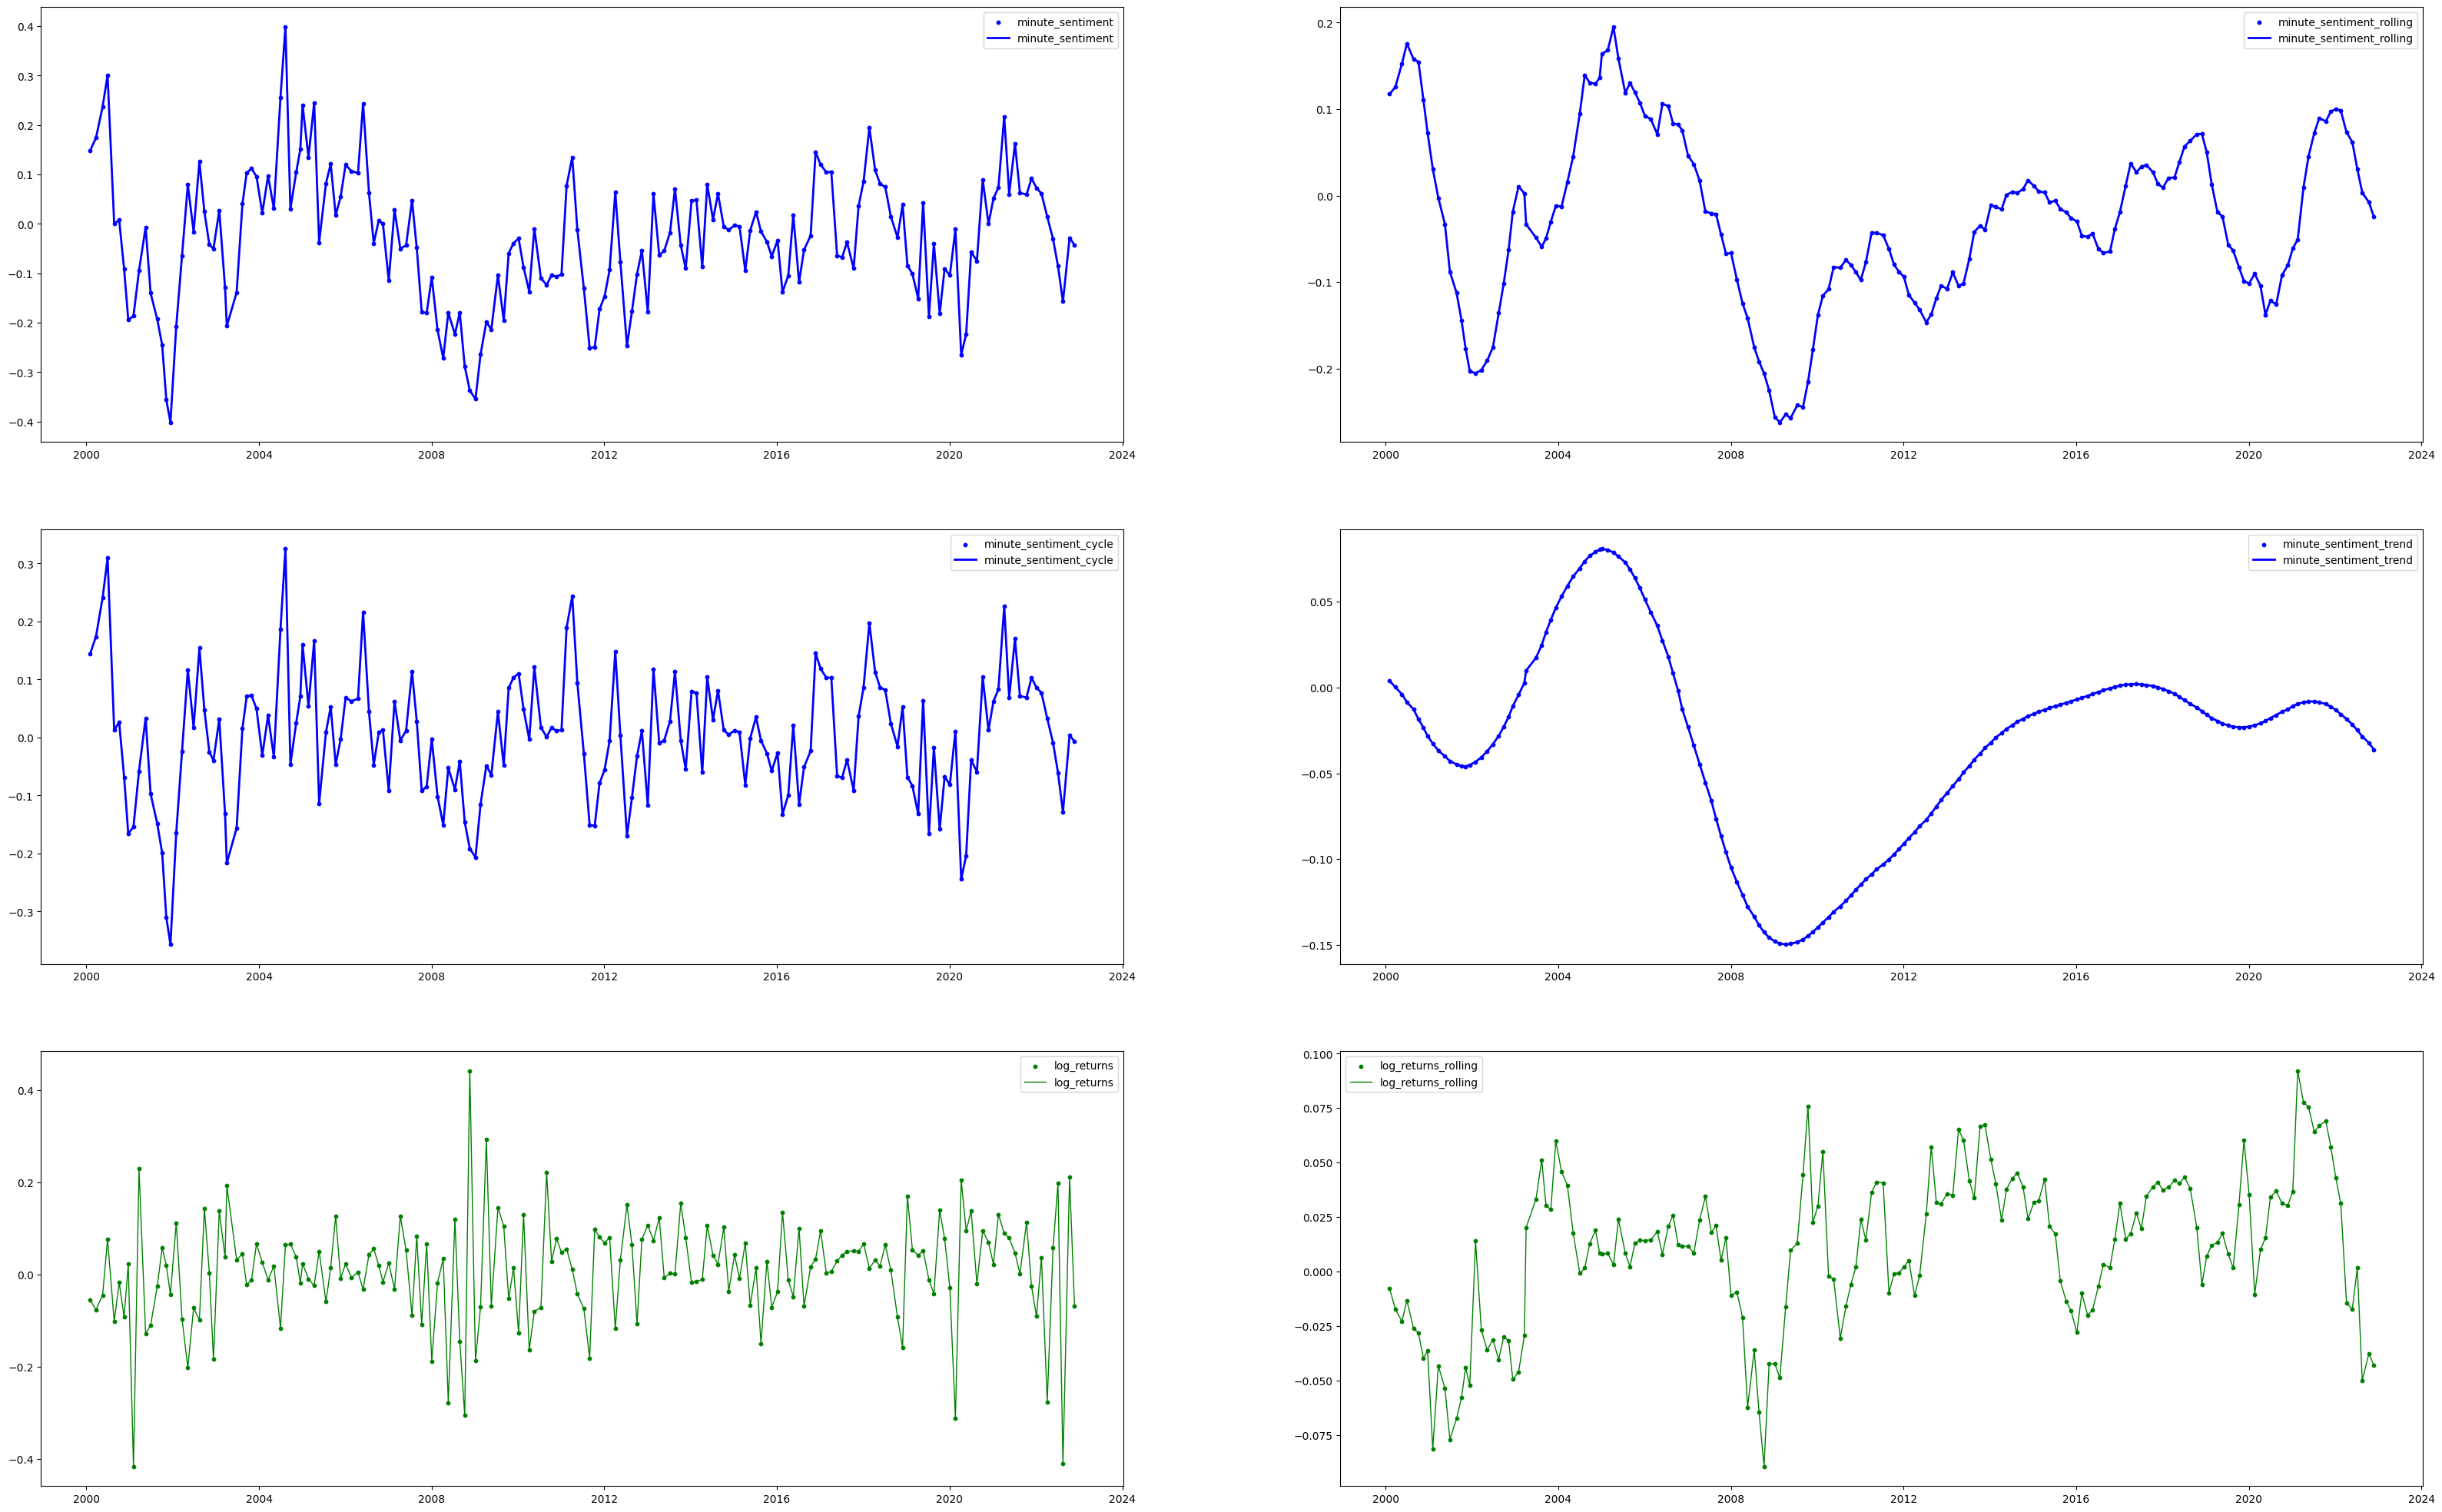

In [73]:
x1 = 'minute_sentiment'
x2 = 'log_returns'
x3 = 'minute_sentiment_rolling'
x4 = 'minute_sentiment_cycle'
x5 = 'minute_sentiment_trend'
x6 = 'log_returns_rolling'

fig, ax = plt.subplots(3, 2, figsize = (40, 25))

ax[0, 0].scatter(sentiment_mb['date'], sentiment_mb[f'{x1}'], label=f'{x1}', color='blue', s=10)
ax[0, 0].plot(sentiment_mb['date'], sentiment_mb[f'{x1}'], label=f'{x1}', color='blue', lw=2)
ax[0, 0].legend()

ax[0, 1].scatter(sentiment_mb['date'], sentiment_mb[f'{x3}'], label=f'{x3}', color='blue', s=10)
ax[0, 1].plot(sentiment_mb['date'], sentiment_mb[f'{x3}'], label=f'{x3}', color='blue', lw=2)
ax[0, 1].legend()

ax[1, 0].scatter(sentiment_mb['date'], sentiment_mb[f'{x4}'], label=f'{x4}', color='blue', s=10)
ax[1, 0].plot(sentiment_mb['date'], sentiment_mb[f'{x4}'], label=f'{x4}', color='blue', lw=2)
ax[1, 0].legend()

ax[1, 1].scatter(sentiment_mb['date'], sentiment_mb[f'{x5}'], label=f'{x5}', color='blue', s=10)
ax[1, 1].plot(sentiment_mb['date'], sentiment_mb[f'{x5}'], label=f'{x5}', color='blue', lw=2)
ax[1, 1].legend()

ax[2, 0].scatter(sentiment_mb['date'], sentiment_mb[f'{x2}'], label=f'{x2}', color='green', s=10)
ax[2, 0].plot(sentiment_mb['date'], sentiment_mb[f'{x2}'], label=f'{x2}', color='green', lw=1)
ax[2, 0].legend()

ax[2, 1].scatter(sentiment_mb['date'], sentiment_mb[f'{x6}'], label=f'{x6}', color='green', s=10)
ax[2, 1].plot(sentiment_mb['date'], sentiment_mb[f'{x6}'], label=f'{x6}', color='green', lw=1)
ax[2, 1].legend()

In [74]:
# x1 = 'mpd_sentiment'
# x2 = 'log_returns'
# x3 = 'mpd_sentiment_rolling'
# x4 = 'mpd_sentiment_cycle'

# #Graph the Data
# fig, ax = plt.subplots(figsize = (40, 20))

# ax.scatter(sentiment_mbe['date'], sentiment_mbe[f'{x1}'], label=f'{x1}', color='blue', s=10)
# ax.plot(sentiment_mbe['date'], sentiment_mbe[f'{x1}'], label=f'{x1}', color='blue', lw=2)

# ax.scatter(sentiment_mbe['date'], sentiment_mbe[f'{x2}'], label=f'{x2}', color='green', s=10)
# ax.plot(sentiment_mbe['date'], sentiment_mbe[f'{x2}'], label=f'{x2}', color='green', lw=1)

# ax.scatter(sentiment_mbe['date'], sentiment_mbe[f'{x3}'], label=f'{x3}', color='red', s=10)
# ax.plot(sentiment_mbe['date'], sentiment_mbe[f'{x3}'], label=f'{x3}', color='red', lw = 2)

# ax.scatter(sentiment_mbe['date'], sentiment_mbe[f'{x4}'], label=f'{x4}', color='purple', s=10)
# ax.plot(sentiment_mbe['date'], sentiment_mbe[f'{x4}'], label=f'{x4}', color='purple')


# #Create a vertical line at every year 
# for year in range(2000, 2025):
#     ax.axvline(pd.to_datetime(f'{year}-01-01'), color='gray', linestyle='--', lw=1)
    
# ax.set_title('ECB Monetary Policy Decision Sentiment and STOXX 600 Returns ')
# ax.set_xlabel('Date')
# ax.legend()
# plt.show()


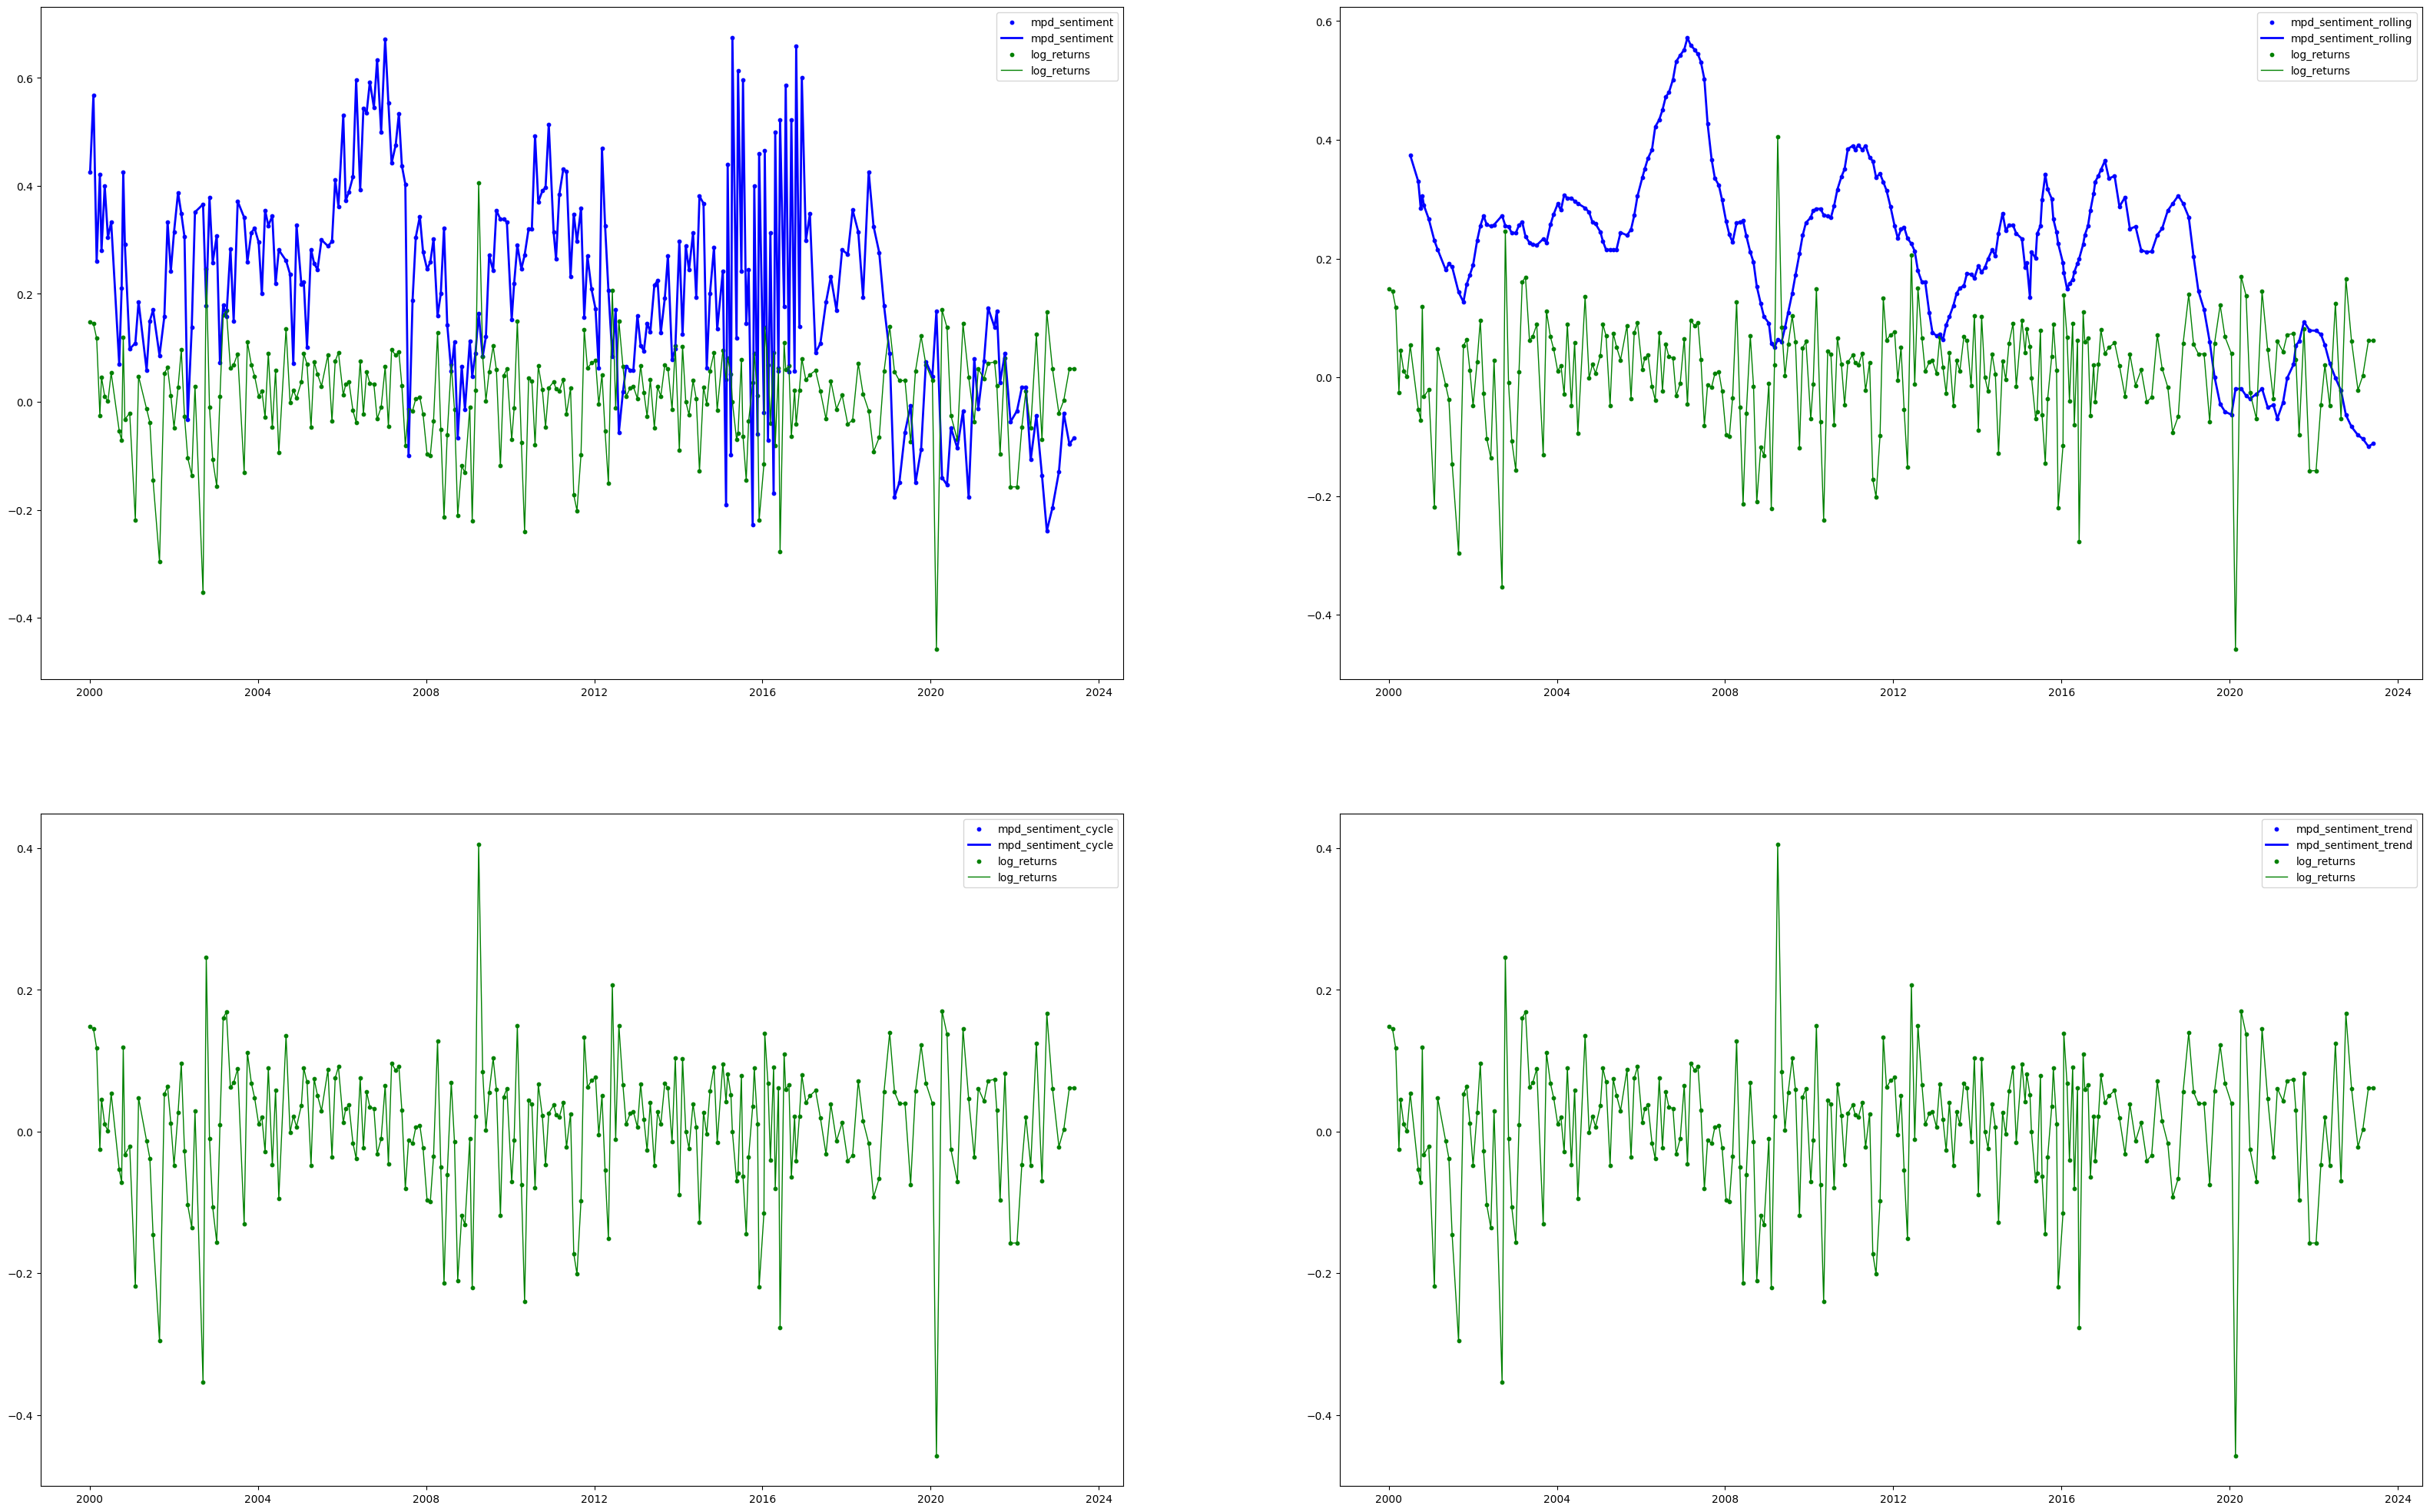

In [75]:
x1 = 'mpd_sentiment'
x2 = 'log_returns'
x3 = 'mpd_sentiment_rolling'
x4 = 'mpd_sentiment_cycle'
x5 = 'mpd_sentiment_trend'

fig, ax = plt.subplots(2, 2, figsize = (40, 25))

ax[0, 0].scatter(sentiment_mbe['date'], sentiment_mbe[f'{x1}'], label=f'{x1}', color='blue', s=10)
ax[0, 0].plot(sentiment_mbe['date'], sentiment_mbe[f'{x1}'], label=f'{x1}', color='blue', lw=2)
ax[0, 0].scatter(sentiment_mbe['date'], sentiment_mbe[f'{x2}'], label=f'{x2}', color='green', s=10)
ax[0, 0].plot(sentiment_mbe['date'], sentiment_mbe[f'{x2}'], label=f'{x2}', color='green', lw=1)
ax[0, 0].legend()

ax[0, 1].scatter(sentiment_mbe['date'], sentiment_mbe[f'{x3}'], label=f'{x3}', color='blue', s=10)
ax[0, 1].plot(sentiment_mbe['date'], sentiment_mbe[f'{x3}'], label=f'{x3}', color='blue', lw=2)
ax[0, 1].scatter(sentiment_mbe['date'], sentiment_mbe[f'{x2}'], label=f'{x2}', color='green', s=10)
ax[0, 1].plot(sentiment_mbe['date'], sentiment_mbe[f'{x2}'], label=f'{x2}', color='green', lw=1)
ax[0, 1].legend()

ax[1, 0].scatter(sentiment_mbe['date'], sentiment_mbe[f'{x4}'], label=f'{x4}', color='blue', s=10)
ax[1, 0].plot(sentiment_mbe['date'], sentiment_mbe[f'{x4}'], label=f'{x4}', color='blue', lw=2)
ax[1, 0].scatter(sentiment_mbe['date'], sentiment_mbe[f'{x2}'], label=f'{x2}', color='green', s=10)
ax[1, 0].plot(sentiment_mbe['date'], sentiment_mbe[f'{x2}'], label=f'{x2}', color='green', lw=1)
ax[1, 0].legend()

ax[1, 1].scatter(sentiment_mbe['date'], sentiment_mbe[f'{x5}'], label=f'{x5}', color='blue', s=10)
ax[1, 1].plot(sentiment_mbe['date'], sentiment_mbe[f'{x5}'], label=f'{x5}', color='blue', lw=2)
ax[1, 1].scatter(sentiment_mbe['date'], sentiment_mbe[f'{x2}'], label=f'{x2}', color='green', s=10)
ax[1, 1].plot(sentiment_mbe['date'], sentiment_mbe[f'{x2}'], label=f'{x2}', color='green', lw=1)
ax[1, 1].legend()


In [76]:
x0 = ['minute_sentiment_1', 'log_returns_0', 'log_returns_1', 'log_returns_2', 'log_returns_3', 'log_returns_4', 'log_returns_5', 'log_returns_6', 'log_returns_7']
x1 = ['minute_sentiment_rolling_1', 'log_returns_0', 'log_returns_1', 'log_returns_2', 'log_returns_3', 'log_returns_4', 'log_returns_5', 'log_returns_6', 'log_returns_7']
x2 = ['minute_sentiment_cycle_1', 'log_returns_0', 'log_returns_1', 'log_returns_2', 'log_returns_3', 'log_returns_4', 'log_returns_5', 'log_returns_6', 'log_returns_7']
x3 = ['minute_sentiment_trend_1', 'log_returns_0', 'log_returns_1', 'log_returns_2', 'log_returns_3', 'log_returns_4', 'log_returns_5', 'log_returns_6', 'log_returns_7']

yvar = 'minute_sentiment'
yvar1 = 'minute_sentiment_rolling'
yvar2 = 'minute_sentiment_cycle'
yvar3 = 'minute_sentiment_trend'

exog0 = (sm.add_constant(sentiment_mb[x0])).dropna()
exog1 = (sm.add_constant(sentiment_mb[x1])).dropna()
exog2 = (sm.add_constant(sentiment_mb[x2])).dropna()
exog3 = (sm.add_constant(sentiment_mb[x3])).dropna()

reg0 = sm.OLS(endog=sentiment_mb[yvar].loc[exog0.index], exog=exog0).fit(cov_type = "HC0")
reg1 = sm.OLS(endog=sentiment_mb[yvar1].loc[exog1.index], exog=exog1).fit(cov_type = "HC0")
reg2 = sm.OLS(endog=sentiment_mb[yvar2].loc[exog2.index], exog=exog2).fit(cov_type = "HC0")
reg3 = sm.OLS(endog=sentiment_mb[yvar3].loc[exog3.index], exog=exog3).fit(cov_type = "HC0")

stargazer = Stargazer([reg0, reg1, reg2, reg3])
display(HTML(stargazer.render_html()))
stargazer.render_latex()

'\\begin{table}[!htbp] \\centering\n\\begin{tabular}{@{\\extracolsep{5pt}}lcccc}\n\\\\[-1.8ex]\\hline\n\\hline \\\\[-1.8ex]\n\\\\[-1.8ex] & (1) & (2) & (3) & (4) \\\\\n\\hline \\\\[-1.8ex]\n const & -0.017$^{**}$ & -0.004$^{**}$ & -0.006$^{}$ & -0.001$^{*}$ \\\\\n& (0.008) & (0.002) & (0.007) & (0.000) \\\\\n log_returns_0 & -0.079$^{}$ & -0.006$^{}$ & -0.099$^{*}$ & 0.006$^{**}$ \\\\\n& (0.058) & (0.013) & (0.057) & (0.002) \\\\\n log_returns_1 & 0.082$^{}$ & 0.003$^{}$ & 0.043$^{}$ & 0.007$^{***}$ \\\\\n& (0.070) & (0.014) & (0.068) & (0.003) \\\\\n log_returns_2 & 0.252$^{***}$ & 0.049$^{***}$ & 0.230$^{***}$ & 0.007$^{***}$ \\\\\n& (0.066) & (0.014) & (0.063) & (0.003) \\\\\n log_returns_3 & 0.162$^{**}$ & 0.053$^{***}$ & 0.187$^{***}$ & 0.004$^{*}$ \\\\\n& (0.067) & (0.016) & (0.062) & (0.003) \\\\\n log_returns_4 & 0.073$^{}$ & 0.047$^{***}$ & 0.106$^{}$ & 0.004$^{}$ \\\\\n& (0.068) & (0.015) & (0.066) & (0.003) \\\\\n log_returns_5 & 0.053$^{}$ & 0.039$^{***}$ & 0.080$^{}$ & 0.0

In [77]:
x0 = ['minute_sentiment_1', 'log_returns_rolling_0', 'log_returns_rolling_1', 'log_returns_rolling_2', 'log_returns_rolling_3', 'log_returns_rolling_4', 'log_returns_rolling_5', 'log_returns_rolling_6', 'log_returns_rolling_7']
x1 = ['minute_sentiment_rolling_1', 'log_returns_rolling_0', 'log_returns_rolling_1', 'log_returns_rolling_2', 'log_returns_rolling_3', 'log_returns_rolling_4', 'log_returns_rolling_5', 'log_returns_rolling_6', 'log_returns_rolling_7']
x2 = ['minute_sentiment_cycle_1', 'log_returns_rolling_0', 'log_returns_rolling_1', 'log_returns_rolling_2', 'log_returns_rolling_3', 'log_returns_rolling_4', 'log_returns_rolling_5', 'log_returns_rolling_6', 'log_returns_rolling_7']
x3 = ['minute_sentiment_trend_1', 'log_returns_rolling_0', 'log_returns_rolling_1', 'log_returns_rolling_2', 'log_returns_rolling_3', 'log_returns_rolling_4', 'log_returns_rolling_5', 'log_returns_rolling_6', 'log_returns_rolling_7']

yvar = 'minute_sentiment'
yvar1 = 'minute_sentiment_rolling'
yvar2 = 'minute_sentiment_cycle'
yvar3 = 'minute_sentiment_trend'

exog0 = (sm.add_constant(sentiment_mb[x0])).dropna()
exog1 = (sm.add_constant(sentiment_mb[x1])).dropna()
exog2 = (sm.add_constant(sentiment_mb[x2])).dropna()
exog3 = (sm.add_constant(sentiment_mb[x3])).dropna()

reg0 = sm.OLS(endog=sentiment_mb[yvar].loc[exog0.index], exog=exog0).fit(cov_type = "HC0")
reg1 = sm.OLS(endog=sentiment_mb[yvar1].loc[exog1.index], exog=exog1).fit(cov_type = "HC0")
reg2 = sm.OLS(endog=sentiment_mb[yvar2].loc[exog2.index], exog=exog2).fit(cov_type = "HC0")
reg3 = sm.OLS(endog=sentiment_mb[yvar3].loc[exog3.index], exog=exog3).fit(cov_type = "HC0")

stargazer = Stargazer([reg0, reg1, reg2, reg3])
display(HTML(stargazer.render_html()))
print(stargazer.render_latex())

\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lcccc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
\\[-1.8ex] & (1) & (2) & (3) & (4) \\
\hline \\[-1.8ex]
 const & -0.019$^{**}$ & -0.004$^{*}$ & -0.008$^{}$ & -0.000$^{}$ \\
& (0.009) & (0.002) & (0.007) & (0.000) \\
 log_returns_rolling_0 & -0.221$^{}$ & -0.051$^{}$ & -0.314$^{}$ & 0.030$^{**}$ \\
& (0.355) & (0.069) & (0.326) & (0.014) \\
 log_returns_rolling_1 & 0.792$^{*}$ & 0.099$^{}$ & 0.718$^{}$ & 0.007$^{}$ \\
& (0.479) & (0.089) & (0.450) & (0.017) \\
 log_returns_rolling_2 & 1.050$^{**}$ & 0.345$^{***}$ & 1.131$^{***}$ & 0.005$^{}$ \\
& (0.442) & (0.080) & (0.409) & (0.016) \\
 log_returns_rolling_3 & -0.850$^{*}$ & -0.007$^{}$ & -0.600$^{}$ & -0.004$^{}$ \\
& (0.479) & (0.087) & (0.451) & (0.018) \\
 log_returns_rolling_4 & -0.083$^{}$ & 0.000$^{}$ & -0.096$^{}$ & 0.001$^{}$ \\
& (0.504) & (0.102) & (0.467) & (0.020) \\
 log_returns_rolling_5 & -0.055$^{}$ & -0.036$^{}$ & -0.073$^{}$ & -0.006$^{}$ \\
& (0.500) & (0

In [78]:
x0 = ['log_returns_1', 'minute_sentiment']
x1 = ['log_returns_1', 'minute_sentiment_rolling']
x2 = ['log_returns_1', 'minute_sentiment_cycle']
x3 = ['log_returns_1', 'minute_sentiment_trend']
x4 = ['log_returns_1', 'minute_sentiment_diff']

yvar = 'log_returns'

exog0 = (sm.add_constant(sentiment_mb[x0])).dropna()
exog1 = (sm.add_constant(sentiment_mb[x1])).dropna()
exog2 = (sm.add_constant(sentiment_mb[x2])).dropna()
exog3 = (sm.add_constant(sentiment_mb[x3])).dropna()

reg0 = sm.OLS(endog=sentiment_mb[yvar].loc[exog0.index], exog=exog0).fit(cov_type = "HC0")
reg1 = sm.OLS(endog=sentiment_mb[yvar].loc[exog1.index], exog=exog1).fit(cov_type = "HC0")
reg2 = sm.OLS(endog=sentiment_mb[yvar].loc[exog2.index], exog=exog2).fit(cov_type = "HC0")
reg3 = sm.OLS(endog=sentiment_mb[yvar].loc[exog3.index], exog=exog3).fit(cov_type = "HC0")

stargazer = Stargazer([reg0, reg1, reg2, reg3])
display(HTML(stargazer.render_html()))
stargazer.render_latex()

'\\begin{table}[!htbp] \\centering\n\\begin{tabular}{@{\\extracolsep{5pt}}lcccc}\n\\\\[-1.8ex]\\hline\n\\hline \\\\[-1.8ex]\n& \\multicolumn{4}{c}{\\textit{Dependent variable: log_returns}} \\\n\\cr \\cline{2-5}\n\\\\[-1.8ex] & (1) & (2) & (3) & (4) \\\\\n\\hline \\\\[-1.8ex]\n const & 0.011$^{}$ & 0.011$^{}$ & 0.012$^{}$ & 0.015$^{**}$ \\\\\n& (0.007) & (0.007) & (0.008) & (0.007) \\\\\n log_returns_1 & -0.267$^{***}$ & -0.269$^{***}$ & -0.268$^{***}$ & -0.270$^{***}$ \\\\\n& (0.083) & (0.085) & (0.083) & (0.083) \\\\\n minute_sentiment & -0.026$^{}$ & & & \\\\\n& (0.069) & & & \\\\\n minute_sentiment_cycle & & & -0.069$^{}$ & \\\\\n& & & (0.078) & \\\\\n minute_sentiment_rolling & & -0.047$^{}$ & & \\\\\n& & (0.090) & & \\\\\n minute_sentiment_trend & & & & 0.108$^{}$ \\\\\n& & & & (0.154) \\\\\n\\hline \\\\[-1.8ex]\n Observations & 184 & 184 & 184 & 184 \\\\\n $R^2$ & 0.072 & 0.073 & 0.076 & 0.074 \\\\\n Adjusted $R^2$ & 0.062 & 0.063 & 0.066 & 0.064 \\\\\n Residual Std. Error & 0.1

In [79]:
x0 = ['mpd_sentiment_0']
x1 = ['mpd_sentiment_1']
x2 = ['mpd_sentiment_2']
x3 = ['mpd_sentiment_3']
x4 = ['mpd_sentiment_4']

yvar = 'log_returns'

exog0 = (sm.add_constant(sentiment_mbe[x0])).dropna()
exog1 = (sm.add_constant(sentiment_mbe[x1])).dropna()
exog2 = (sm.add_constant(sentiment_mbe[x2])).dropna()
exog3 = (sm.add_constant(sentiment_mbe[x3])).dropna()
exog4 = (sm.add_constant(sentiment_mbe[x4])).dropna()

reg0 = sm.OLS(endog=sentiment_mbe[yvar].loc[exog0.index], exog=exog0).fit()
reg1 = sm.OLS(endog=sentiment_mbe[yvar].loc[exog1.index], exog=exog1).fit()
reg2 = sm.OLS(endog=sentiment_mbe[yvar].loc[exog2.index], exog=exog2).fit()
reg3 = sm.OLS(endog=sentiment_mbe[yvar].loc[exog3.index], exog=exog3).fit()
reg4 = sm.OLS(endog=sentiment_mbe[yvar].loc[exog4.index], exog=exog4).fit()

stargazer = Stargazer([reg0, reg1, reg2, reg3, reg4])
display(HTML(stargazer.render_html()))
stargazer.render_latex()

'\\begin{table}[!htbp] \\centering\n\\begin{tabular}{@{\\extracolsep{5pt}}lccccc}\n\\\\[-1.8ex]\\hline\n\\hline \\\\[-1.8ex]\n& \\multicolumn{5}{c}{\\textit{Dependent variable: log_returns}} \\\n\\cr \\cline{2-6}\n\\\\[-1.8ex] & (1) & (2) & (3) & (4) & (5) \\\\\n\\hline \\\\[-1.8ex]\n const & 0.015$^{*}$ & 0.004$^{}$ & 0.012$^{}$ & -0.003$^{}$ & 0.014$^{}$ \\\\\n& (0.009) & (0.009) & (0.009) & (0.009) & (0.009) \\\\\n mpd_sentiment_0 & -0.035$^{}$ & & & & \\\\\n& (0.032) & & & & \\\\\n mpd_sentiment_1 & & 0.015$^{}$ & & & \\\\\n& & (0.032) & & & \\\\\n mpd_sentiment_2 & & & -0.027$^{}$ & & \\\\\n& & & (0.032) & & \\\\\n mpd_sentiment_3 & & & & 0.040$^{}$ & \\\\\n& & & & (0.032) & \\\\\n mpd_sentiment_4 & & & & & -0.034$^{}$ \\\\\n& & & & & (0.032) \\\\\n\\hline \\\\[-1.8ex]\n Observations & 258 & 257 & 256 & 255 & 254 \\\\\n $R^2$ & 0.005 & 0.001 & 0.003 & 0.006 & 0.004 \\\\\n Adjusted $R^2$ & 0.001 & -0.003 & -0.001 & 0.002 & 0.000 \\\\\n Residual Std. Error & 0.097 (df=256) & 0.097 (